# Assignment - 5

In [4]:
# importing libraries
import numpy as np
import time
from scipy import signal
import matplotlib.pyplot as plt

1. Generate the following signal for 1 sec duration at sampling frequency of 200 Hz.
  
                x(t) = 9 sin (2πf1t) + 7 sin (2πf2t) + 5 sin (2πf3t) + 3 sin (2πf4t)          ............(1)
                
   where f1 = 5 Hz, f2 = 15 Hz, f3 = 25 Hz and f4 = 50 Hz.

   (a) Plot x(t).

In [5]:
# Function for x[n].
def x_t(f1,f2,f3,f4,t):
    x = []
    for i in t:
        x1 = 9*np.sin(2*np.pi*f1*i);
        x2 = 7*np.sin(2*np.pi*f2*i);
        x3 = 5*np.sin(2*np.pi*f3*i);
        x4 = 3*np.sin(2*np.pi*f4*i);
        x.append(x1+x2+x3+x4)
    return x

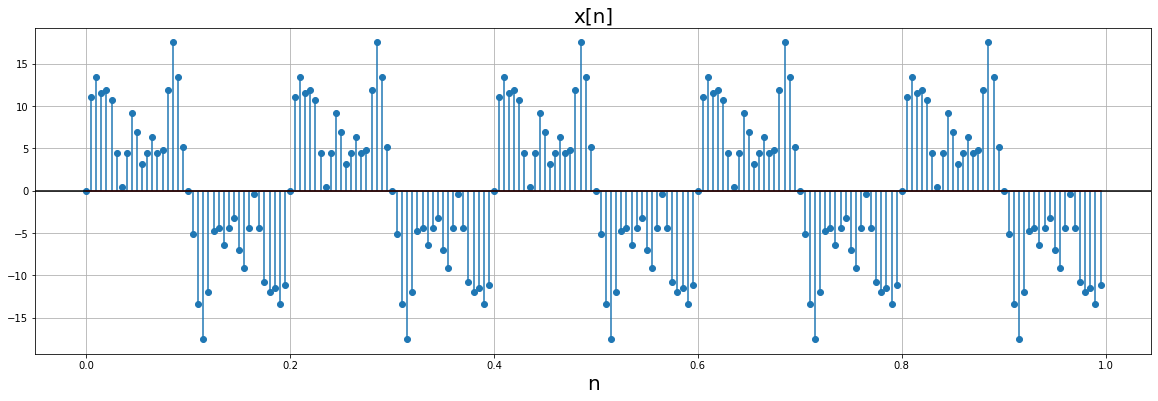

In [6]:
# Plot of x[n] sequence.
plt.subplots(figsize=(20,6))

f1 = 5;
f2 = 15;
f3 = 25;
f4 = 50;
fs = 200;
n = np.arange(0,1,1/fs)
X_t = x_t(f1,f2,f3,f4,n)

plt.stem(n,X_t)
plt.xlabel('n',fontsize=20)
plt.title('x[n]',fontsize=20)
plt.axhline(color = "Black")
plt.grid()

(b) Determine the DFT of x(t) and plot its 1-sided magnitude spectrum (with frequency in Hz on x-axis).

In [7]:
# Function for DFT calculation.
def DFT(x):
    N = len(x)
    out = []
    for k in range(N):
        dft = 0
        for n in range(N):
            dft+=(x[n]*np.exp(-2j*np.pi*k*n/N))
        out.append(dft)
    return out

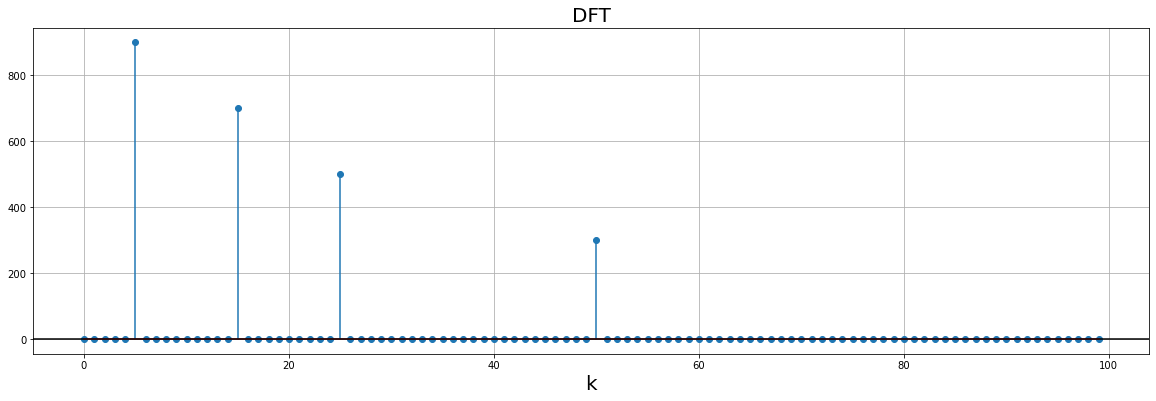

In [8]:
# Plot of DFT sequence.
plt.subplots(figsize=(20,6))

DFT_X = DFT(X_t)
k = np.arange(0,int(len(DFT_X)/2))

plt.stem(k,np.absolute(DFT_X)[0:int(len(DFT_X)/2)])
plt.xlabel('k',fontsize=20)
plt.title('DFT',fontsize=20)
plt.axhline(color = "Black");
plt.grid()

(c) Generate a digital butterworth bandpass filter of order-6 (using scipy) with 10 Hz and 30 Hz as its lower and upper cutoff frequencies, respectively, and plot its magnitude spectrum.

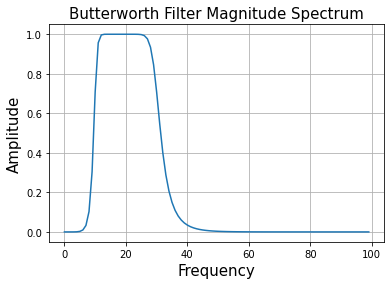

In [9]:
plt.subplots(figsize=(6,4))

# Digital butterworth filter.
N = 6
Wn = [10,30]
b, a = signal.butter(N,Wn,'bp',fs=200,)
w, h = signal.freqz(b, a, worN=100)

# Magnitude plot of digital butterworth filter.
plt.plot((100*w)/np.pi,abs(h))
plt.title('Butterworth Filter Magnitude Spectrum',fontsize=15)
plt.xlabel('Frequency',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.grid()

(d) Multiply the frequency response of bandpass filter and DFT spectrum of x(t) to obtain the filtered spectrum and plot the same.

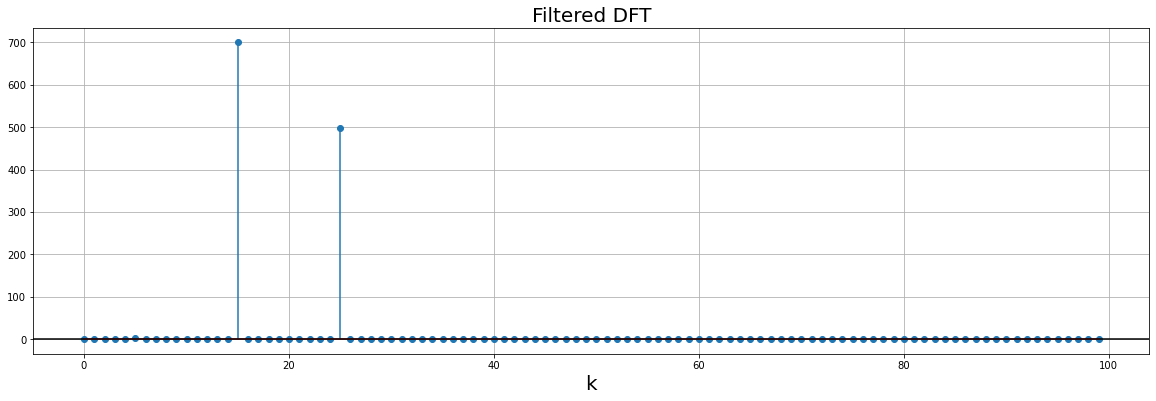

In [10]:
plt.subplots(figsize=(20,6))

# Multiplying the frequency response of bandpass filter and DFT.
filtered_response = h*DFT_X[0:int(len(DFT_X)/2)]

# Plotting the filtered output.
plt.stem(k,np.absolute(filtered_response))
plt.xlabel('k',fontsize=20)
plt.title('Filtered DFT',fontsize=20)
plt.axhline(color = "Black");
plt.grid()

(e) Apply inverse DFT on the filtered spectrum to obtain the filtered signal and plot the same.

In [11]:
# Function for Inverse DFT.
def IDFT(x):
    N = len(x)
    out = []
    for n in range(N):
        idft = 0
        for k in range(N):
            idft+=((x[k]*np.exp(2j*np.pi*k*n/N))/N)
        out.append(idft)
    return out

C:\Users\Rohit\anaconda3\lib\site-packages\numpy\ma\core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\Rohit\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Rohit\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


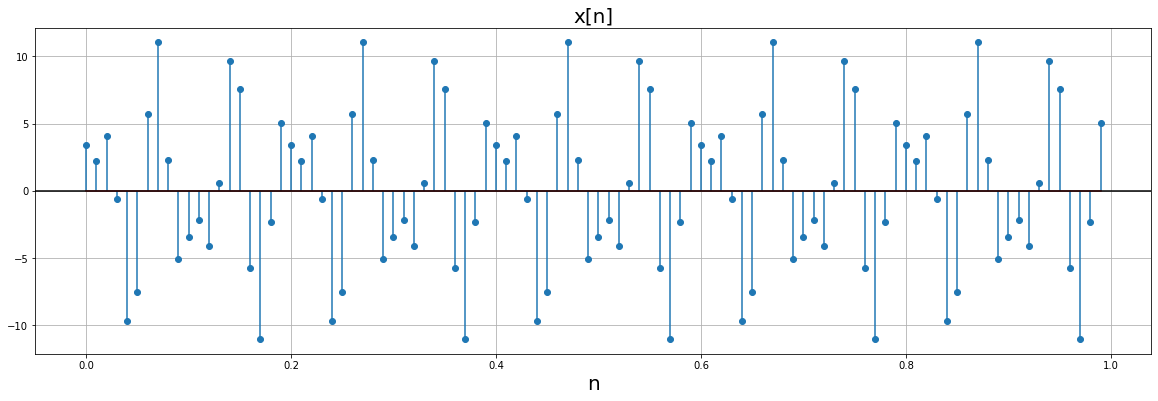

In [12]:
plt.subplots(figsize=(20,6))

# Calculating inverse DFT.
n = np.arange(0,1,1/100)
IDFT_x = IDFT(filtered_response)

# Plotting IDFT sequence.
plt.stem(n,IDFT_x)
plt.xlabel('n',fontsize=20)
plt.title('x[n]',fontsize=20)
plt.axhline(color = "Black")
plt.grid()

2. Design a 2-pole band-stop filter that has the centre of its stop band at ω = π/2 and peak in its frequency response characteristic at ω = 0 and ω = π, and a magnitude response of 1/√2 at ω = 4π/9.

   (a) Determine the transfer function of the filter (calculate manually) and plot its magnitude and phase spectra.

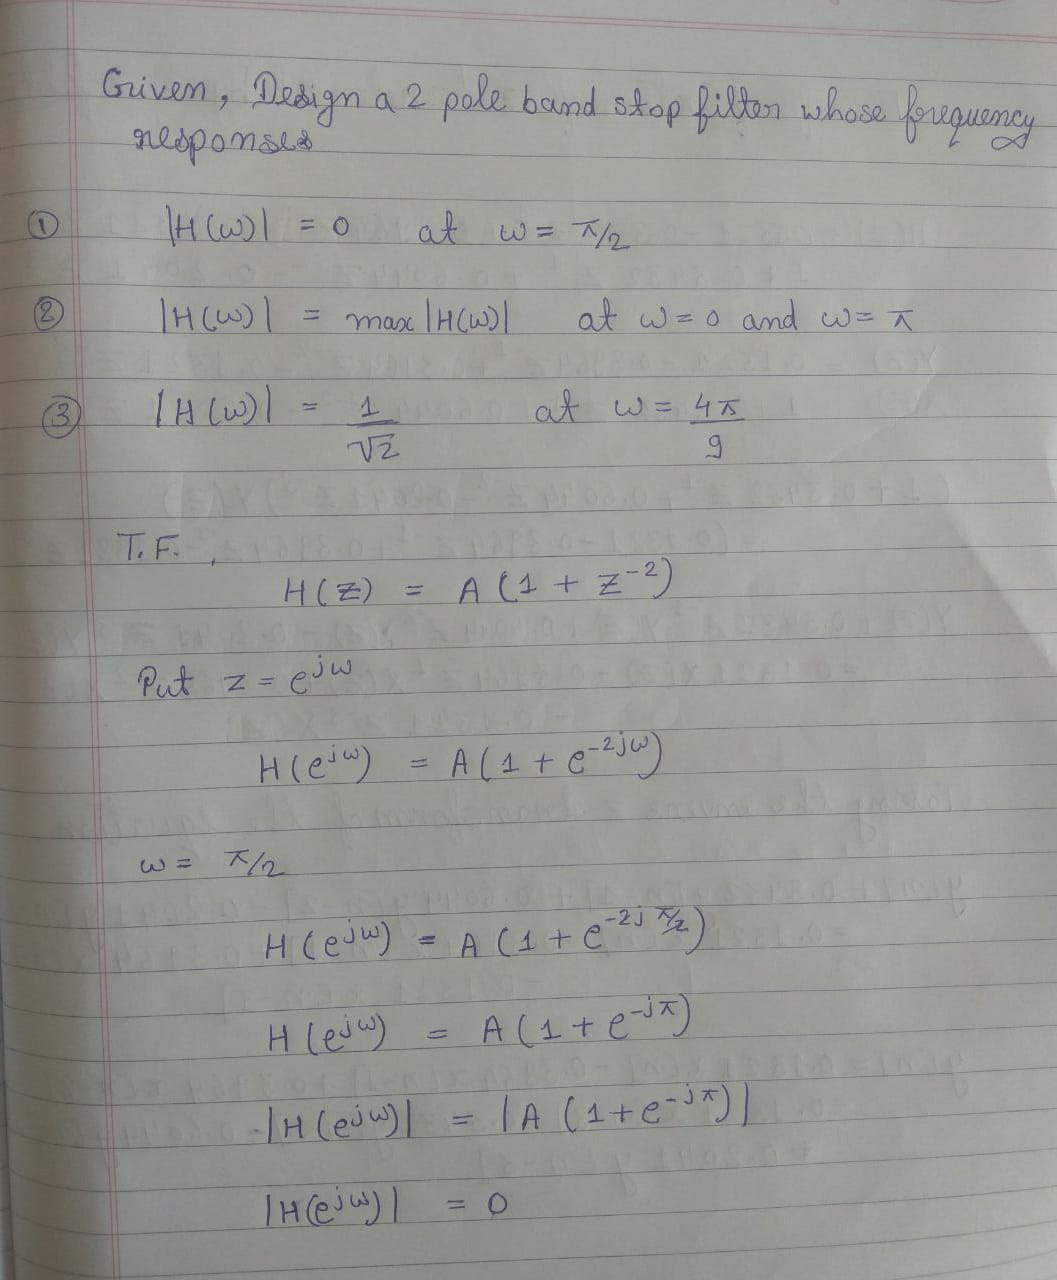

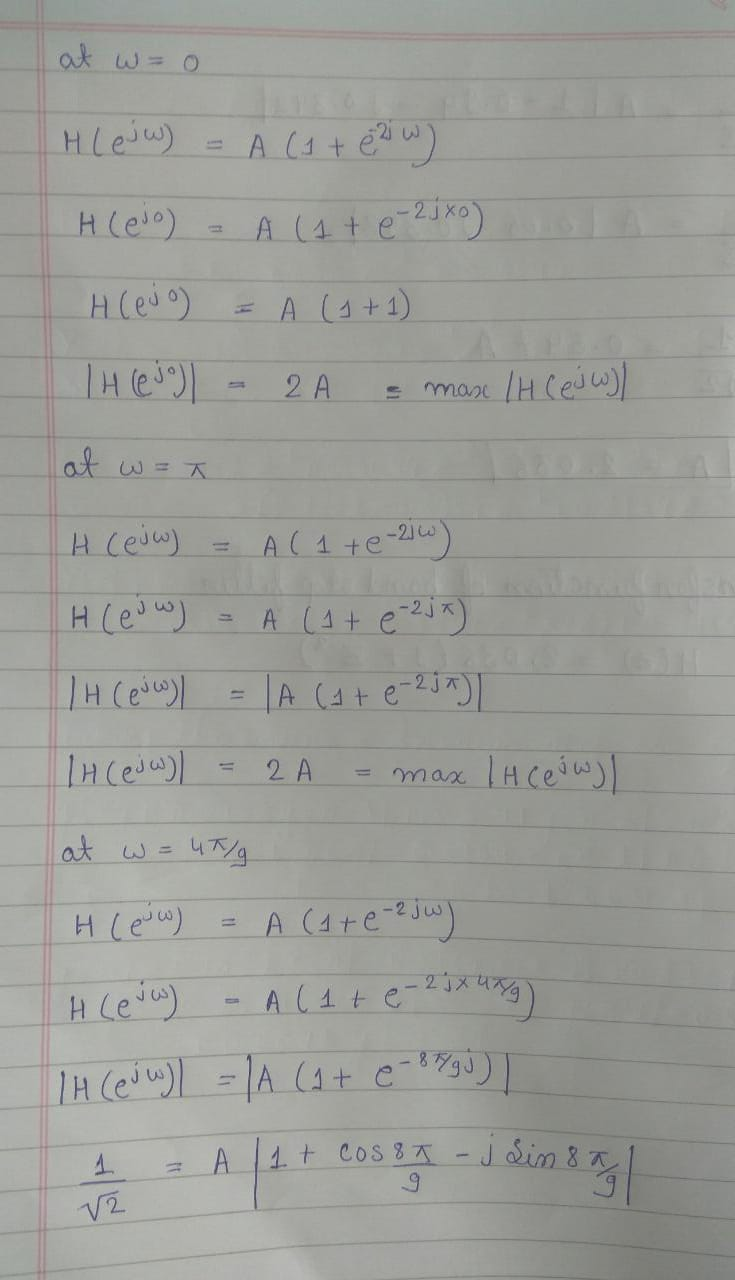

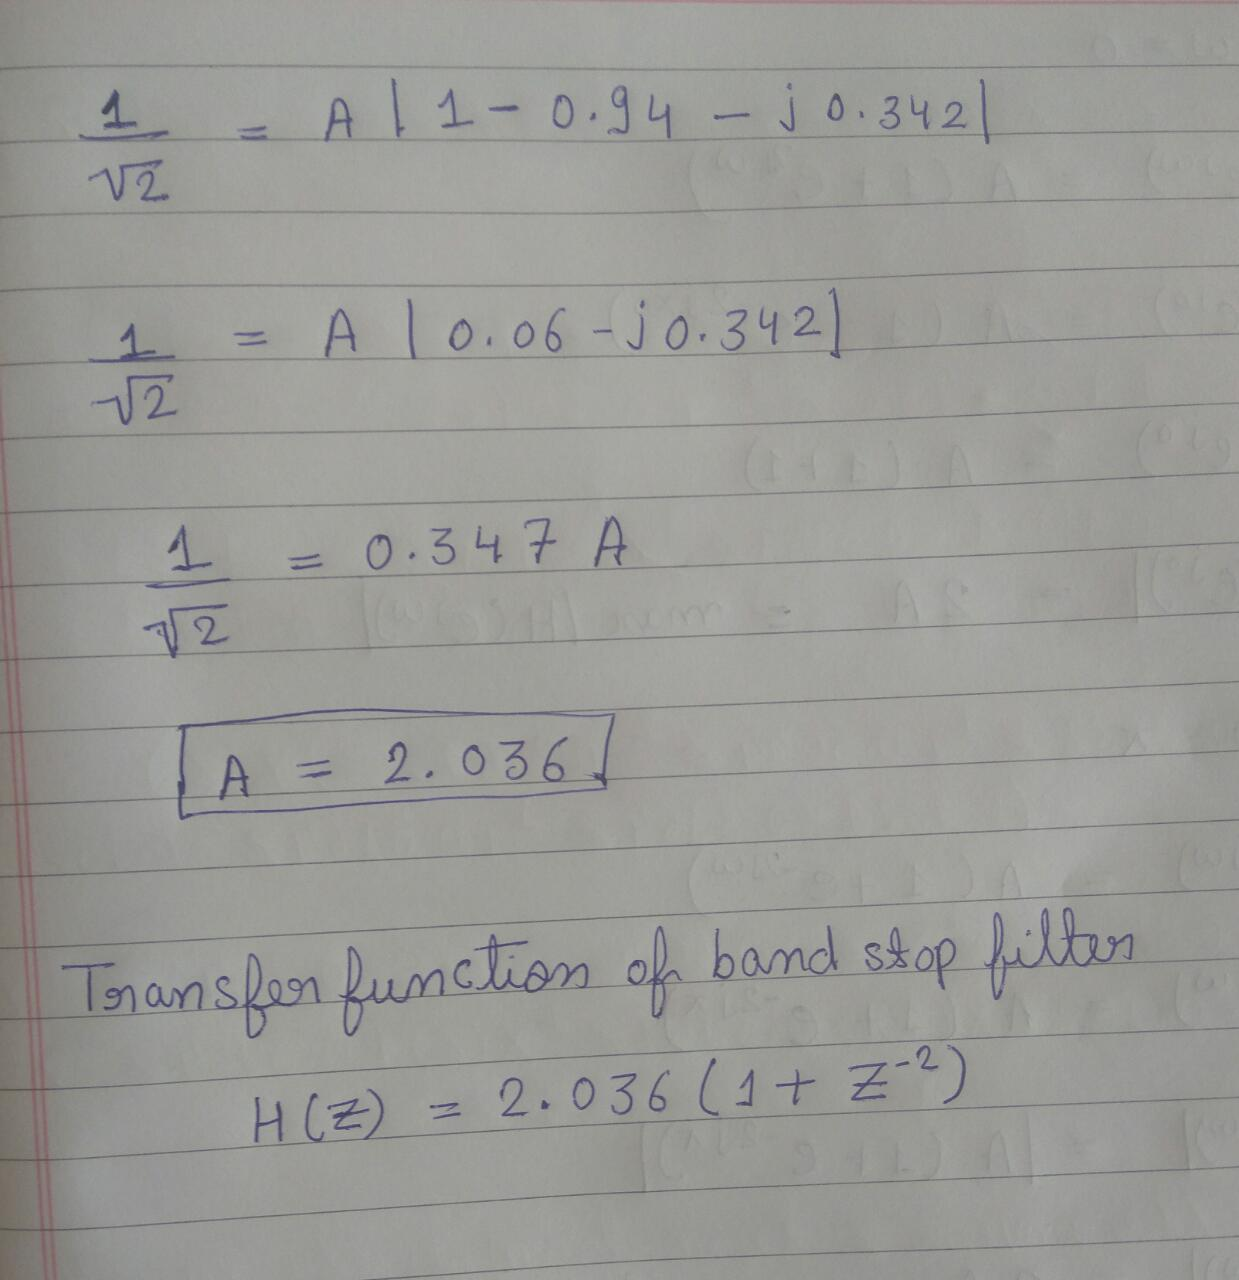

In [13]:
# Function for band stop filter.
def Bandstop_filter(omega):
    out = []
    for i in omega:
        z = np.exp(1j*i)
        f1 = 2.036*(1 + (z**(-2)))
        out.append(f1)
    return out

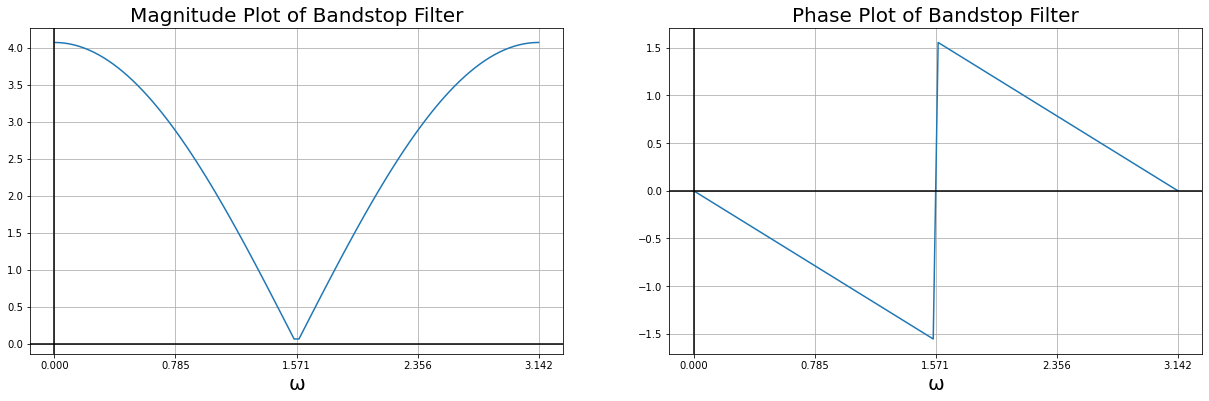

In [14]:
fig, axes = plt.subplots(1,2,figsize=(21,6))

# Calculating the response of band stop filter.
omega = np.linspace(0,np.pi,100)
b_s = Bandstop_filter(omega)

# Magnitude plot of band stop filter.
axes[0].plot(omega,np.absolute(b_s))
axes[0].set_xlabel('ω',fontsize=20)
axes[0].set_title('Magnitude Plot of Bandstop Filter',fontsize=20)
axes[0].axhline(color = "Black")
axes[0].axvline(color = "Black")
axes[0].set_xticks([0,0.25*np.pi,0.5*np.pi,0.75*np.pi,np.pi])
axes[0].grid()

# Phase plot of band stop filter.
axes[1].plot(omega,np.angle(b_s))
axes[1].set_xlabel('ω',fontsize=20)
axes[1].set_title('Phase Plot of Bandstop Filter',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].axvline(color = "Black")
axes[1].set_xticks([0,0.25*np.pi,0.5*np.pi,0.75*np.pi,np.pi])
axes[1].grid()

(b) Multiply the frequency response of band-stop filter and DFT spectrum of x(t) (of Question No. 1) to obtain the filtered spectrum and plot the same.

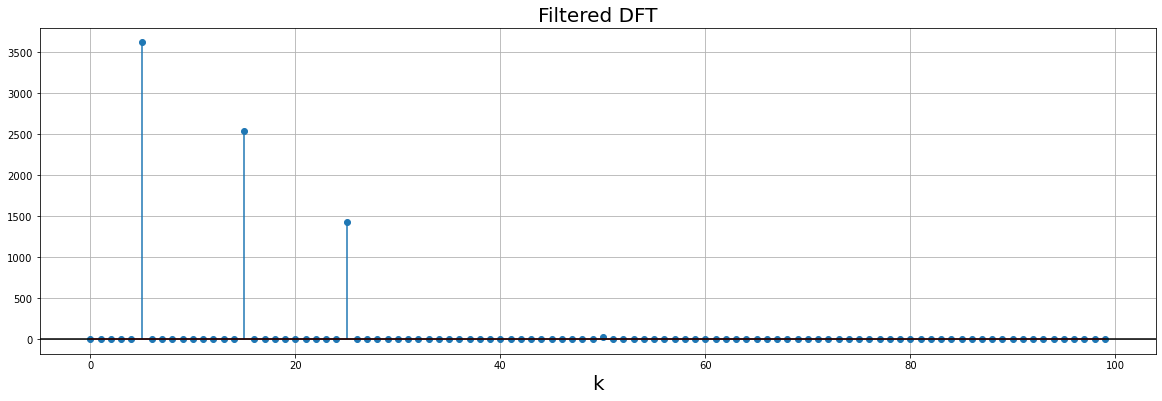

In [15]:
plt.subplots(figsize=(20,6))

# Multiplying the frequency response of bandstop filter and DFT.
k = np.arange(0,100)
bandstop_filtered_response = np.array(b_s)*DFT_X[0:int(len(DFT_X)/2)]

# Plotting the filtered output.
plt.stem(k,np.absolute(bandstop_filtered_response))
plt.xlabel('k',fontsize=20)
plt.title('Filtered DFT',fontsize=20)
plt.axhline(color = "Black");
plt.grid()

(c) Apply inverse DFT on the filtered spectrum to obtain the filtered signal and plot the same.

C:\Users\Rohit\anaconda3\lib\site-packages\numpy\ma\core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\Rohit\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Rohit\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


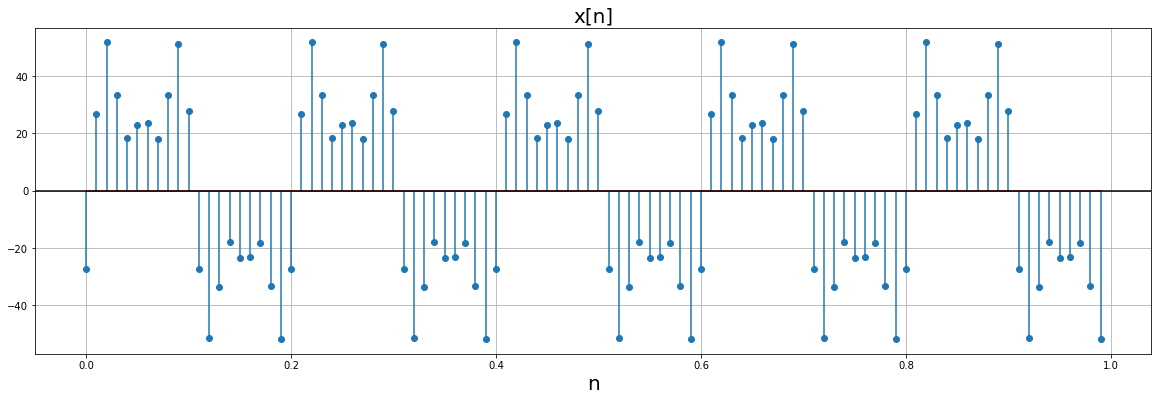

In [16]:
plt.subplots(figsize=(20,6))

# Applying inverse DFT on filtered signal.
n = np.arange(0,1,1/100)
IDFT_x = IDFT(bandstop_filtered_response)

# Plotting the IDFT.
plt.stem(n,IDFT_x)
plt.xlabel('n',fontsize=20)
plt.title('x[n]',fontsize=20)
plt.axhline(color = "Black")
plt.grid()

3. For the digital filter shown below

               H(z) = (−0.2 + 0.18z^−1 + 0.4z^−2 + z^−3)/(1 + 0.4z^−1 + 0.18z^−2 − 0.2z^−3)           ................(2)
               
   (a) Determine the poles and zeros of H(z). What type of filter is this? Is there any relationship between the poles and zeros of H(z). If yes, explain the same.

## Ans. 
This is all pass filter. There is a relation between poles and zeros if a pole is at z = ak then a zero is at z = 1/(ak)∗.

In [17]:
# Function for circle.
def Circle(r):
    omega = np.arange(0,2*np.pi,0.01)
    x = r*np.cos(omega)
    y = r*np.sin(omega)
    return x,y

It is a All Pass digital filter.
Ploes of digital filter = [-0.4+0.58309519j -0.4-0.58309519j  0.4+0.j        ]
Zeros of digital filter = [ 2.5+0.j         -0.8+1.16619038j -0.8-1.16619038j]


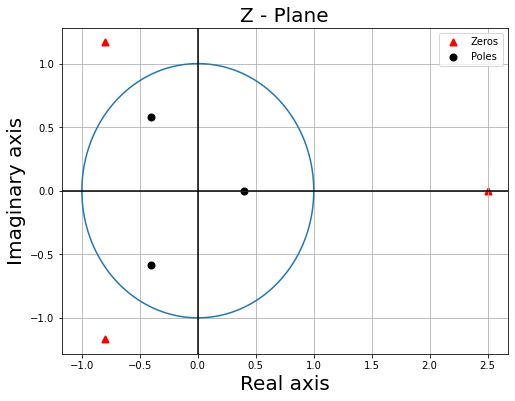

In [18]:
plt.subplots(figsize=(8,6))

# Calculating ploes and zeros of H(z).
num = [-0.2,0.18,0.4,1]
den = [1,0.4,0.18,-0.2]
[z,p,k]=signal.tf2zpk(num, den)
print("It is a All Pass digital filter.")
print("Ploes of digital filter =",p)
print("Zeros of digital filter =",z)

# Calculating real and imaginary part of zeros.
z_real = np.real(z)
z_imag = np.imag(z)

# Calculating real and imaginary part of ploes.
p_real = np.real(p)
p_imag = np.imag(p)

# Generating unit circle.
r = 1
circ = Circle(r)

# Plot of poles and zeros.
plt.plot(circ[0],circ[1])
plt.scatter(z_real,z_imag,color = 'red',linewidths = 2,marker ="^",label='Zeros')
plt.scatter(p_real,p_imag,color = 'black',linewidths = 2,label='Poles')
plt.xlabel('Real axis',fontsize=20)
plt.ylabel('Imaginary axis',fontsize=20)
plt.title('Z - Plane',fontsize=20)
plt.axhline(color = "Black")
plt.axvline(color = "Black")
plt.grid()
plt.legend()

(b) Plot the magnitude and phase spectra of H(z).

In [19]:
# Function for H(z).
def H(omega):
    out = []
    for i in omega:
        z = np.exp(1j*i)
        f1 = -0.2 + (0.18*(z**(-1))) + (0.4*(z**(-2))) + (z**(-3))
        f2 = 1 + (0.4*(z**(-1))) + (0.18*(z**(-2))) - (0.2*(z**(-3)))
        out.append(f1/f2)
    return out

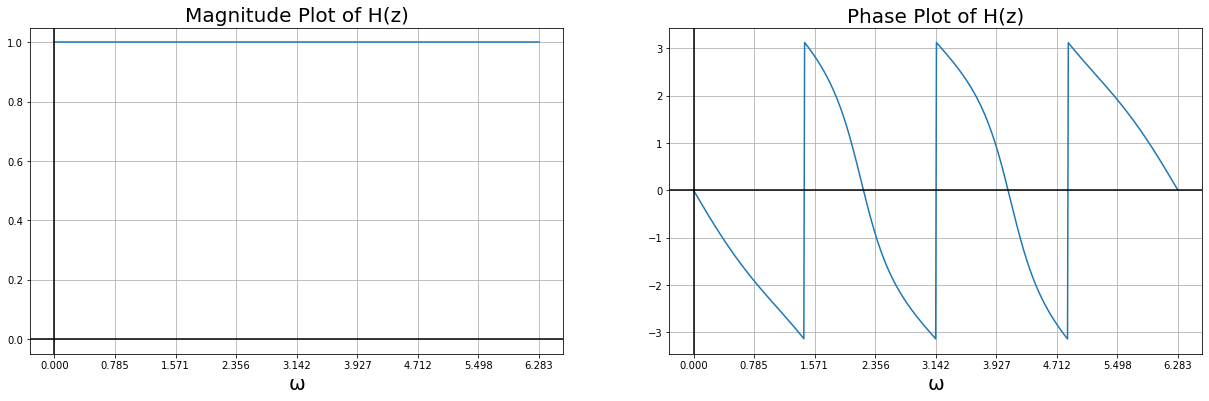

In [20]:
fig, axes = plt.subplots(1,2,figsize=(21,6))

# Calculating the response of H(z).
omega = np.arange(0,2*np.pi,0.01)
H_z = H(omega)

# Magnitude plot of H(z).
axes[0].plot(omega,np.absolute(H_z))
axes[0].set_xlabel('ω',fontsize=20)
axes[0].set_title('Magnitude Plot of H(z)',fontsize=20)
axes[0].axhline(color = "Black")
axes[0].axvline(color = "Black")
axes[0].set_xticks([0,0.25*np.pi,0.5*np.pi,0.75*np.pi,np.pi,1.25*np.pi,1.5*np.pi,1.75*np.pi,2*np.pi])
axes[0].grid()

# Phase plot of H(z).
axes[1].plot(omega,np.angle(H_z))
axes[1].set_xlabel('ω',fontsize=20)
axes[1].set_title('Phase Plot of H(z)',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].axvline(color = "Black")
axes[1].set_xticks([0,0.25*np.pi,0.5*np.pi,0.75*np.pi,np.pi,1.25*np.pi,1.5*np.pi,1.75*np.pi,2*np.pi])
axes[1].grid()

4. Design a third-order digital highpass Chebyshev filter with a cutoff frequency of 2 kHz and 1 dB ripple on the passband at a sampling frequency of 8, 000 Hz.

   (a) Determine the transfer function and the difference equation.

In [21]:
# 3rd order high pass Chevyshev filter.
b,a = signal.cheby1(3, 1, 2000, 'hp',fs=8000)
print(b)
print(a)

[ 0.13214071 -0.39642212  0.39642212 -0.13214071]
[1.         0.34319322 0.60439354 0.20407467]


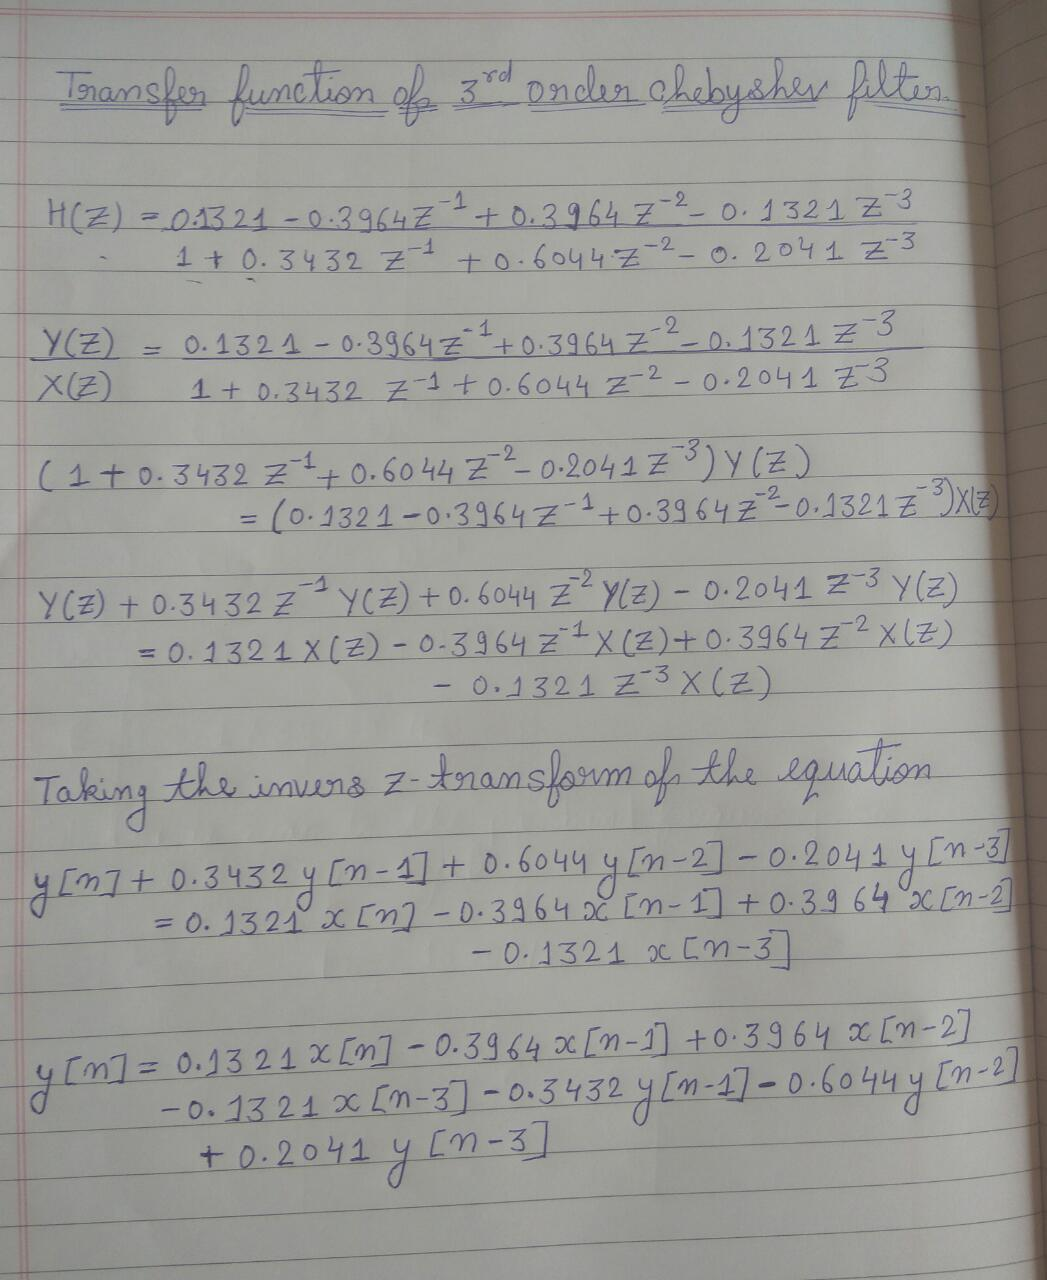

(b) Plot the magnitude and phase frequency responses.

In [22]:
omega, h = signal.freqz(b, a, worN=100)

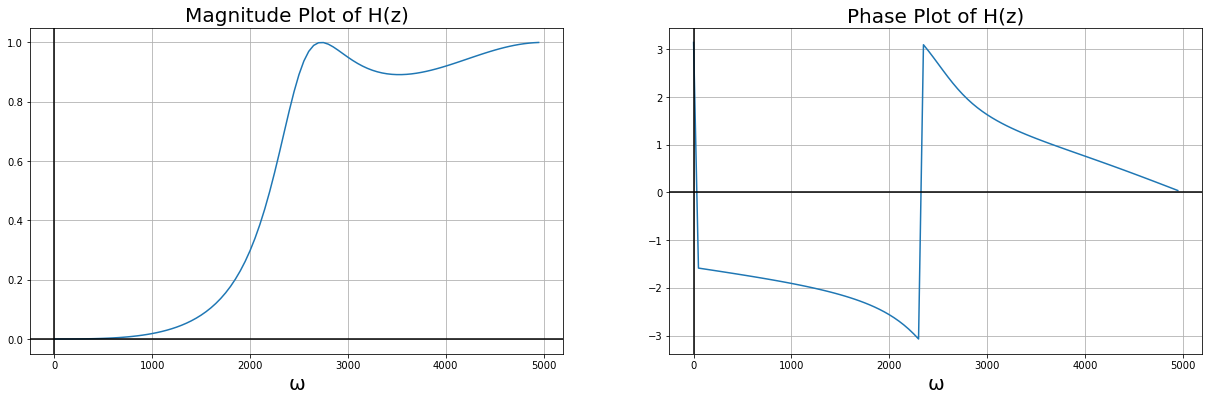

In [23]:
fig, axes = plt.subplots(1,2,figsize=(21,6))

# Magnitude plot of chebyshev.
axes[0].plot(10000*omega/(2*np.pi),np.absolute(h))
axes[0].set_xlabel('ω',fontsize=20)
axes[0].set_title('Magnitude Plot of H(z)',fontsize=20)
axes[0].axhline(color = "Black")
axes[0].axvline(color = "Black")
axes[0].grid()

# Phase plot of chebyshev.
axes[1].plot(10000*omega/(2*np.pi),np.angle(h))
axes[1].set_xlabel('ω',fontsize=20)
axes[1].set_title('Phase Plot of H(z)',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].axvline(color = "Black")
axes[1].grid()

(c) Find the zeros and poles, and plot them.

Ploes of digital filter = [-0.00232899-0.77640918j -0.33853523+0.j         -0.00232899+0.77640918j]
Zeros of digital filter = [1. 1. 1.]


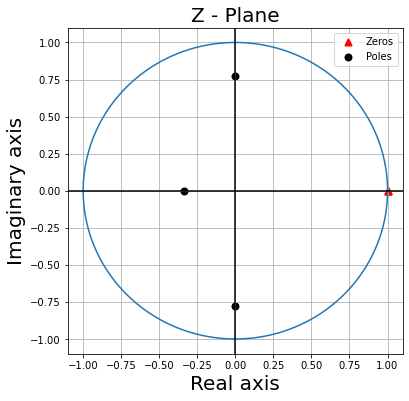

In [24]:
plt.subplots(figsize=(6,6))

# Calculating ploes and zeros of chebyshev.
z,p,k = signal.cheby1(3, 1, 2000, 'hp',fs=8000, output='zpk')
print("Ploes of digital filter =",p)
print("Zeros of digital filter =",z)

# Calculating real and imaginary part of zeros.
z_real = np.real(z)
z_imag = np.imag(z)

# Calculating real and imaginary part of ploes.
p_real = np.real(p)
p_imag = np.imag(p)

# Generating unit circle.
r = 1
circ = Circle(r)

# Plot of poles and zeros.
plt.plot(circ[0],circ[1])
plt.scatter(z_real,z_imag,color = 'red',linewidths = 2,marker ="^",label='Zeros')
plt.scatter(p_real,p_imag,color = 'black',linewidths = 2,label='Poles')
plt.xlabel('Real axis',fontsize=20)
plt.ylabel('Imaginary axis',fontsize=20)
plt.title('Z - Plane',fontsize=20)
plt.axhline(color = "Black")
plt.axvline(color = "Black")
plt.grid()
plt.legend()

5. Design a digital lowpass Butterworth filter with the following specifications:

   (a) 3 dB attenuation at the passband frequency of 1.5 kHz.
   
   (b) 10 dB stopband attenuation at the frequency of 3 kHz.
   
   (c) Sampling frequency of 8, 000 Hz.
   
   Plot the magnitude and phase responses.

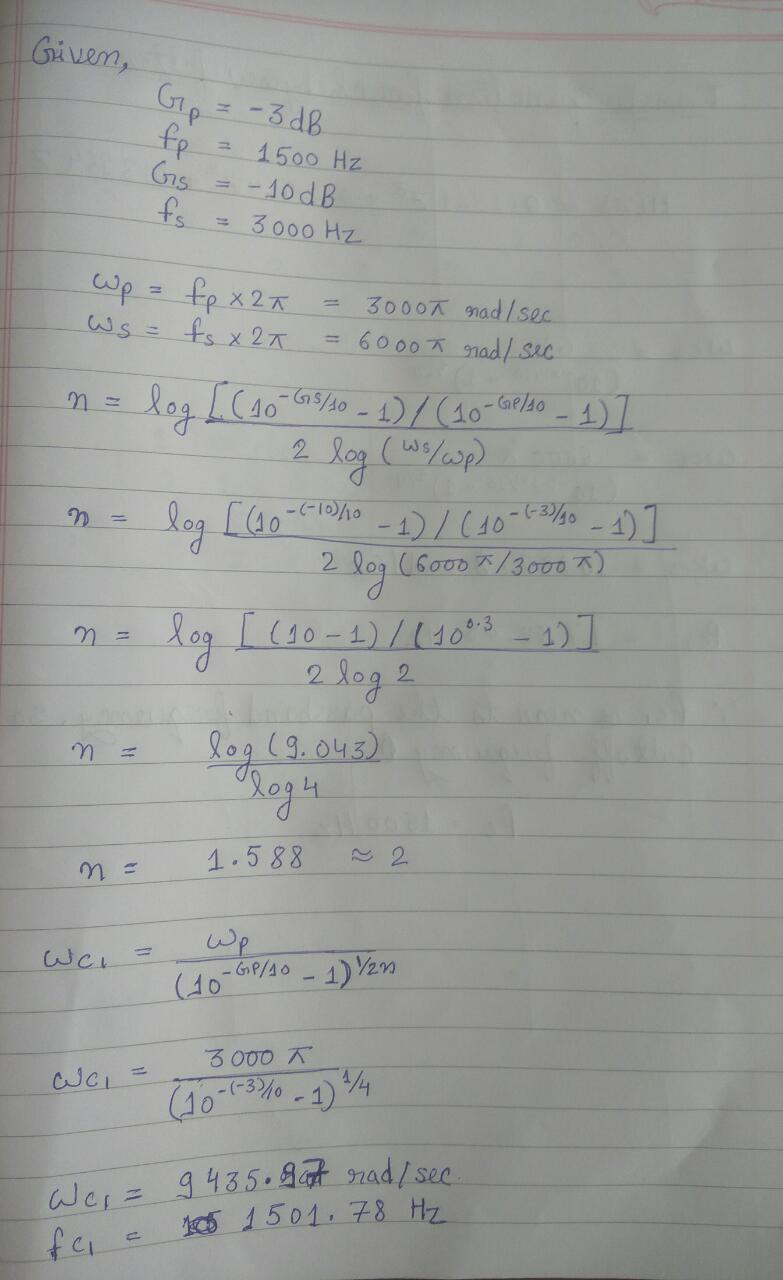

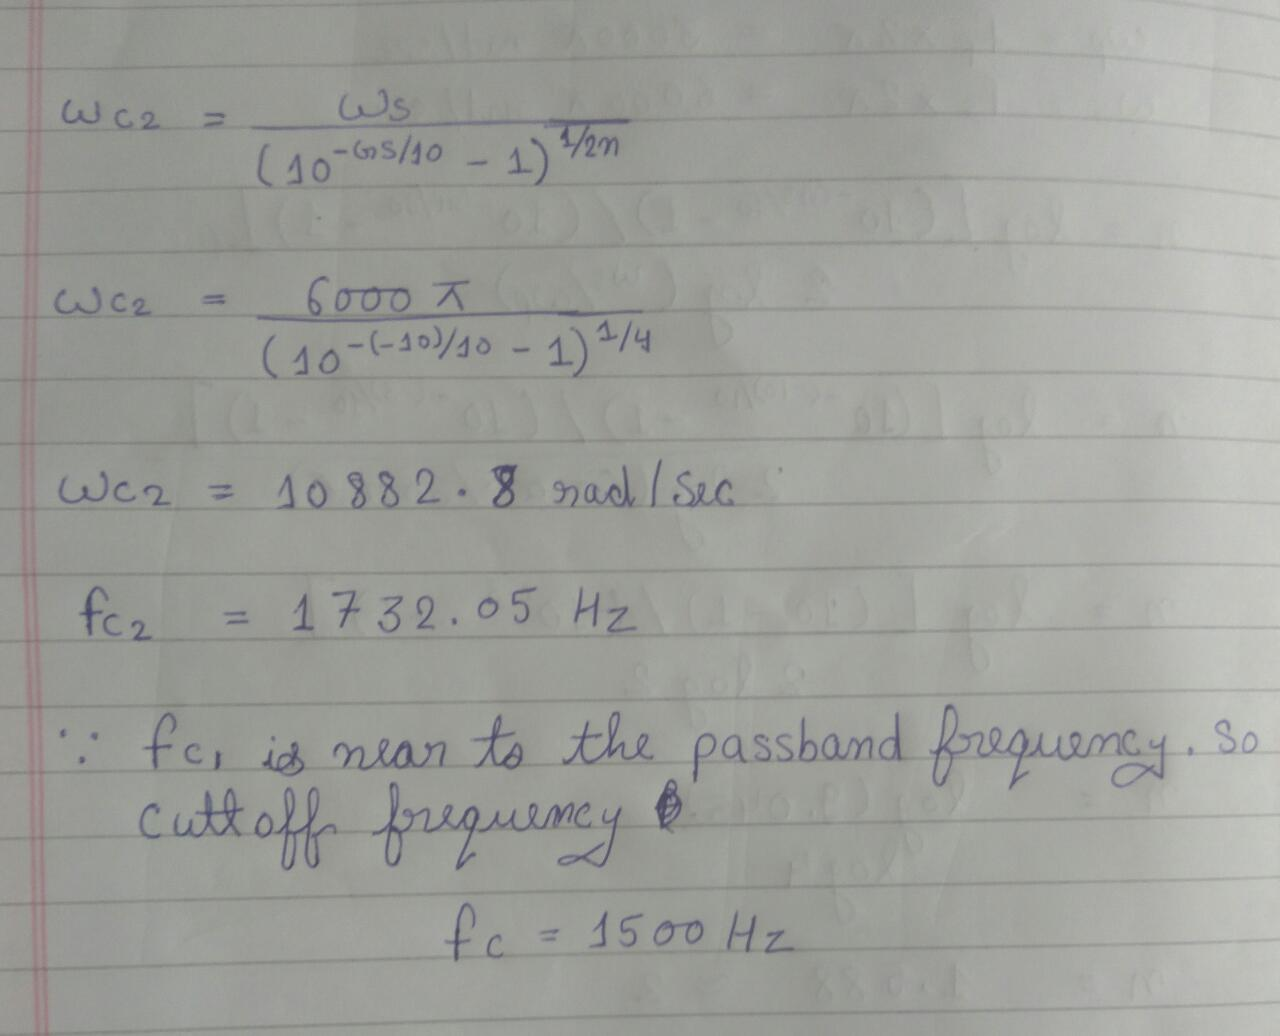

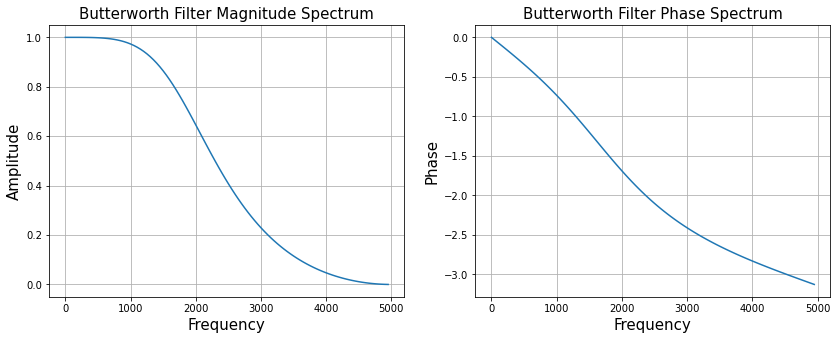

In [25]:
fig, axes = plt.subplots(1,2,figsize=(14,5))

# Lowpass butterworth filter.
b, a = signal.butter(2, 1500, 'low', fs=8000)
w, h = signal.freqz(b, a, worN=100)

# Magnitude spectrum of lowpass butterworth filter.
axes[0].plot((10000*w)/(2*np.pi),abs(h))
axes[0].set_title('Butterworth Filter Magnitude Spectrum',fontsize=15)
axes[0].set_xlabel('Frequency',fontsize=15)
axes[0].set_ylabel('Amplitude',fontsize=15)
axes[0].grid()

# Phase spectrum of lowpass butterworth filter
axes[1].plot((10000*w)/(2*np.pi),np.angle(h))
axes[1].set_title('Butterworth Filter Phase Spectrum',fontsize=15)
axes[1].set_xlabel('Frequency',fontsize=15)
axes[1].set_ylabel('Phase',fontsize=15)
axes[1].grid()

6. Fast Fourier Transform (FFT)

   Consider a random sequence x[n] of length N = 1024.

   (a) Write a function to compute the DFT of the sequence. How many operations are required for computing the DFT? Don’t use any inbuilt function for this part. After implementation, compute the time taken by the code to run using the time library.

## Ans.
Computing the DFT for all values of N N^2 number of complex multiplication is required and N(N-1) complex addition is required.

In [26]:
# Generating the random sequence.
N = 1024
x_n = np.random.randint(10,size=N)

In [27]:
# Calculating the DFT and its execution time.
start_time = time.time()
DFT_x_n = DFT(x_n)
end_time = time.time()
normal_time = end_time - start_time
print("Execution time =",normal_time)

Execution time = 3.788961887359619


(b) Compute the DFT of sequence using np.fft. Compute the time taken by the code to run using the time library.

In [28]:
# Calculating the DFT and its execution time by using inbuilt function.
start_time = time.time()
FFT_x_n = np.fft.fft(x_n)
end_time = time.time()
standard_time = end_time - start_time
print("Execution time =",standard_time)

Execution time = 0.0009968280792236328


(c) Are the implementations in part (a) and part (b) similar? Compare the closeness and compute time for both the parts? What
can be concluded?

The mean absolute error between the output is 1.4282035419264623e-11


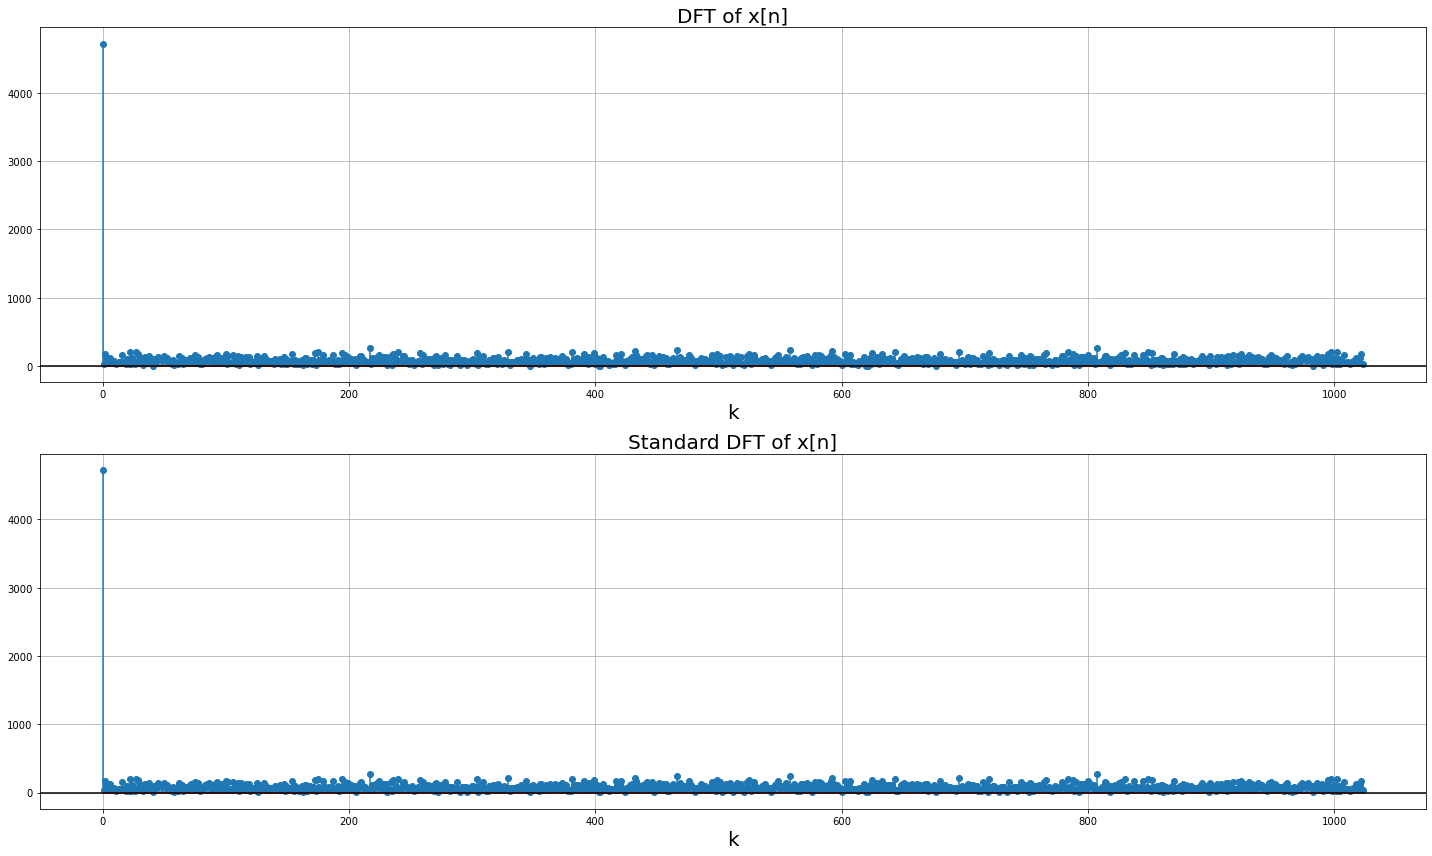

In [43]:
fig,axes = plt.subplots(2,1,figsize=(20,12))

# Mean absolute error between signals.
abs_error = np.mean(np.absolute(FFT_x_n - DFT_x_n))
print("The mean absolute error between the output is",abs_error)

n = np.arange(0,N)

# Plot of DFT.
axes[0].stem(n,np.absolute(DFT_x_n))
axes[0].set_xlabel('k',fontsize=20)
axes[0].set_title('DFT of x[n]',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()

# Plot of DFT by using inbuilt function.
axes[1].stem(n,np.absolute(FFT_x_n))
axes[1].set_xlabel('k',fontsize=20)
axes[1].set_title('Standard DFT of x[n]',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].grid()
plt.tight_layout()

(d) Vary the number of samples N from 1, 2, 4, 8, ..., 2048. For each N compare the performance in terms of time for DFT implemented in part (a) and FFT implemented in part (b). Plot a graph for the same.

In [44]:
N = [1,2,4,8,16,32,64,128,256,512,1024,2048]
normal_time = []
standard_time = []

# Varying the number sequence and calculating the execution time. 
for i in N:
    X_n = np.random.randint(10,size=i)
    
    start_time1 = time.time()
    DFT_X_n = DFT(X_n)
    end_time1 = time.time()
    normal_time.append(end_time1 - start_time1)
    
    start_time2 = time.time()
    FFT_X_n = np.fft.fft(X_n)
    end_time2 = time.time()
    standard_time.append(end_time2 - start_time2)

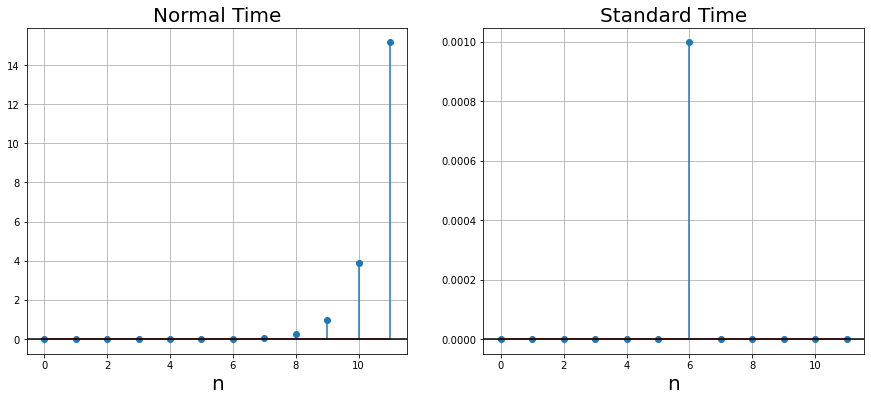

In [45]:
fig, axes = plt.subplots(1,2,figsize=(15,6))

n = np.arange(0,len(N))

# Plot of execution time.
axes[0].stem(n,normal_time)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('Normal Time',fontsize=20)
axes[0].axhline(color = "Black")
axes[0].grid()

# Plot of execution time.
axes[1].stem(n,standard_time)
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_title('Standard Time',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].grid()

7. Decimation in Time (DIT)

Consider a sequence x[n] = {1, 1, 1, 1, 0, 0, 0, 0}, compute the DFT of the following sequence using 8-point radix-2 DIT-FFT algorithm. Plot the sequence and the resulting DFT. Also compute the time taken to run the code.

In [46]:
# Function for twiddle factor.
def twiddle_factor(n,k,c):
    w = np.zeros((n,k),dtype=complex)
    for i in range(n):
        for j in range(k):
            if i==j:
                w[i][j] = np.exp(-2j*np.pi*(i+j)/(8*c))
            else:
                w[i][j] = 0
    return w    

In [47]:
# Function for 4N-point DIT FFT.
def N_4_point_DIT_FFT(a_n):
    a1 = np.array(([1,1],[1,-1]))
    a2 = np.zeros((2,2),dtype=complex)
    a3 = np.concatenate((a1, a2), axis=1)
    a4 = np.concatenate((a2, a1), axis=1)
    a5 = np.concatenate((a3, a4), axis=0)
    a6 = np.zeros((4,4),dtype=complex)
    a7 = np.concatenate((a5, a6), axis=1)
    a8 = np.concatenate((a6, a5), axis=1)
    a = np.concatenate((a7, a8), axis=0)
    out = np.dot(a,np.array(a_n).T)
    return out

In [48]:
# Function for 2N-point DIT FFT.
def N_2_point_DIT_FFT(b_n):
    b1 = np.identity(2,dtype=float)
    b2 = twiddle_factor(2,2,1)
    b3 = np.concatenate((b1, b1), axis=0)
    b4 = np.concatenate((b2, -b2), axis=0)
    b5 = np.concatenate((b3, b4), axis=1)
    b6 = np.zeros((4,4),dtype=complex)
    b7 = np.concatenate((b5, b6), axis=1)
    b8 = np.concatenate((b6, b5), axis=1)
    b = np.concatenate((b7, b8), axis=0)
    out = np.dot(b,np.array(b_n).T)
    return out

In [49]:
# Function for N-point DIT FFT.
def N_point_DIT_FFT(c_n):
    c1 = np.identity(4,dtype=float)
    c2 = twiddle_factor(4,4,2)
    c3 = np.concatenate((c1, c1), axis=0)
    c4 = np.concatenate((c2, -c2), axis=0)
    c = np.concatenate((c3, c4), axis=1)
    out = np.dot(c,np.array(c_n).T)
    return out

In [50]:
# Function for calculting DFT.
def DIT_FFT(x):
    d = [0,4,2,6,1,5,3,7]
    X = []
    for i in d:
        X.append(x[i])
    dit_dft_4 = N_4_point_DIT_FFT(X)
    dit_dft_2 = N_2_point_DIT_FFT(dit_dft_4)
    dit_dft =  N_point_DIT_FFT(dit_dft_2)
    return dit_dft

Execution time of 8-point radix-2 DIT-FFT algorithm = 0.0029921531677246094


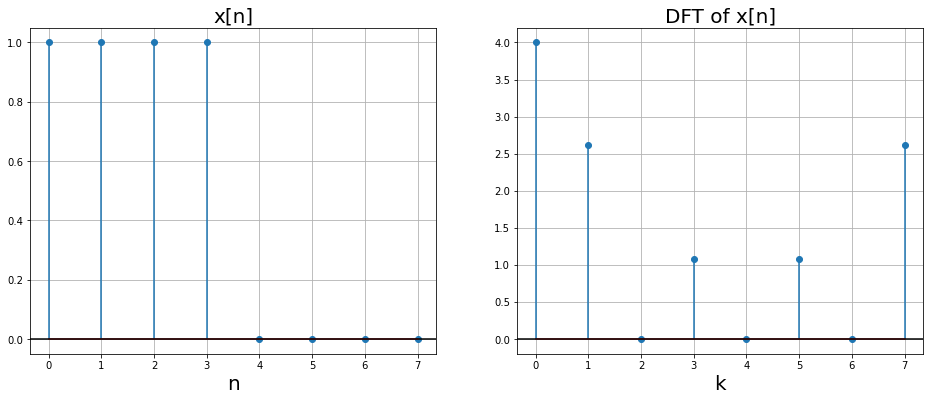

In [51]:
fig, axes = plt.subplots(1,2,figsize=(16,6))

n = np.arange(0,8)
x = [1,1,1,1,0,0,0,0]

# Calculating the DFT.
start_time = time.time()
dit_fft = DIT_FFT(x)
end_time = time.time()

execution_time = end_time - start_time
print("Execution time of 8-point radix-2 DIT-FFT algorithm =",execution_time)

# Plot of input signal.
axes[0].stem(n,x)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('x[n]',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()

# Plot of DFT sequence.
axes[1].stem(n,np.absolute(dit_fft))
axes[1].set_xlabel('k',fontsize=20)
axes[1].set_title('DFT of x[n]',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].grid()

8. Decimation in Frequency (DIF)

For the sequence in the previous question, compute the DFT using 8-point radix-2 DIF-FFT algorithm. Plot the sequence and the resulting DFT. Compare the time taken to run the code with previous case.

In [52]:
# Function for N-point DIF FFT.
def N_point_DIF_FFT(x_n):
    x1 = np.identity(4,dtype=float)
    x2 = twiddle_factor(4,4,2)
    x3 = np.concatenate((x1, x1), axis=1)
    x4 = np.concatenate((x2, -x2), axis=1)
    x = np.concatenate((x3, x4), axis=0)
    out = np.dot(x,np.array(x_n).T)
    return out

In [53]:
# Function for 2N-point DIF FFT.
def N_2_point_DIF_FFT(y_n):
    y1 = np.identity(2,dtype=float)
    y2 = twiddle_factor(2,2,1)
    y3 = np.concatenate((y1, y1), axis=1)
    y4 = np.concatenate((y2, -y2), axis=1)
    y5 = np.concatenate((y3, y4), axis=0)
    y6 = np.zeros((4,4),dtype=complex)
    y7 = np.concatenate((y5, y6), axis=1)
    y8 = np.concatenate((y6, y5), axis=1)
    y = np.concatenate((y7, y8), axis=0)
    out = np.dot(y,np.array(y_n).T)
    return out

In [54]:
# Function for 4N-point DIT FFT.
def N_4_point_DIF_FFT(z_n):
    z1 = np.array(([1,1],[1,-1]))
    z2 = np.zeros((2,2),dtype=complex)
    z3 = np.concatenate((z1, z2), axis=1)
    z4 = np.concatenate((z2, z1), axis=1)
    z5 = np.concatenate((z3, z4), axis=0)
    z6 = np.zeros((4,4),dtype=complex)
    z7 = np.concatenate((z5, z6), axis=1)
    z8 = np.concatenate((z6, z5), axis=1)
    z = np.concatenate((z7, z8), axis=0)
    out = np.dot(z,np.array(z_n).T)
    return out

In [55]:
# Function for calculting DFT.
def DIF_FFT(x):
    dif_fft = N_point_DIF_FFT(x)
    dif_fft_2 = N_2_point_DIF_FFT(dif_fft)
    dif_fft_4 = N_4_point_DIF_FFT(dif_fft_2)
    d = [0,4,2,6,1,5,3,7]
    X_k = []
    for i in d:
        X_k.append(dif_fft_4[i])
    return X_k

Execution time of 8-point radix-2 DIF-FFT algorithm = 0.0


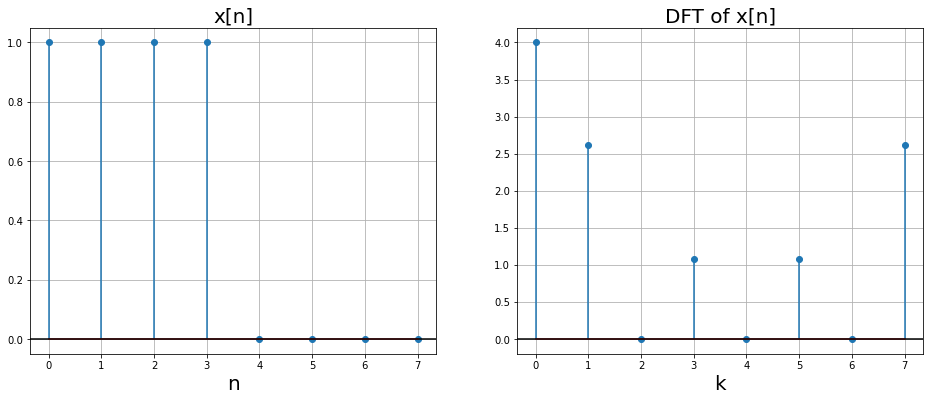

In [56]:
fig, axes = plt.subplots(1,2,figsize=(16,6))

n = np.arange(0,8)
x = [1,1,1,1,0,0,0,0]

# Calculating the DFT.
start_time = time.time()
dif_fft = DIF_FFT(x)
end_time = time.time()

execution_time = end_time - start_time
print("Execution time of 8-point radix-2 DIF-FFT algorithm =",execution_time)

# Plot of input signal.
axes[0].stem(n,x)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('x[n]',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()

# Plot of DFT sequence.
axes[1].stem(n,np.absolute(dif_fft))
axes[1].set_xlabel('k',fontsize=20)
axes[1].set_title('DFT of x[n]',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].grid()

9. Circular Convolution

Consider a system with input x[n] = {1, 2, 3, 1} and h[n] = {1, 1, 1}, compute the output sequence y[n] using

(a) Linear convolution

(b) Circular convolution

Write Python functions to implement both operations from the first principle. How can you implement circular convolution through the properties of FFT?

In [57]:
# function for linear convolution.
def linear_convolution(x1,x2):
    result = []
    x3 = []
    for i in range(len(x2)):
        x3.append(x1*x2[i])
    temp = len(x3)
    for i in range(temp):
        for j in range(temp-1-i):
            x3[i] = np.insert(x3[i],len(x3[i]),0)
    for i in range(temp):
        for j in range(i):
            x3[i] = np.insert(x3[i],0,0)
    for i in range(len(x3[0])):
        add = 0
        for j in range(temp):
            add+=x3[j][i]
        result.append(add)
    return result

In [58]:
# Calculating the linear convolution.
x_n = np.array([1,2,3,1])
h_n = np.array([1,1,1])
lc = linear_convolution(x_n,h_n)
print("Linear Convolution of x[n] and h[n] =",lc)

Linear Convolution of x[n] and h[n] = [1, 3, 6, 6, 4, 1]


In [59]:
# Function for circular convolution.
def circular_convolution(x,h):
    m = len(x)
    n = len(h)
    d = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            d[i][j] = h[int((i+j)%n)]
    out = np.dot(d,np.array(x).T)
    return out

In [60]:
# Calculating the linear convolution.
x = [1,2,3,1]
h = [1,1,1]
length_x = len(x)
length_h = len(h)
while(len(h)<length_x):
    h.append(0)
    
cc = circular_convolution(x,h)
print("Circular Convolution of x[n] and h[n] =",cc)

Circular Convolution of x[n] and h[n] = [6. 4. 5. 6.]
